In [2]:
import spacy

In [3]:
# Import the PorterStemmer class
from nltk.stem import PorterStemmer
from rake_nltk import Rake
#import nltk
import nltk
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [4]:
text = "NLP is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human language."
# Create a stemmer object
stemmer = PorterStemmer()

# Stem each word in the text
stems = [stemmer.stem(word) for word in text.split()]

# Print the stems
print(stems)


['nlp', 'is', 'a', 'subfield', 'of', 'comput', 'scienc', 'and', 'artifici', 'intellig', 'that', 'deal', 'with', 'the', 'interact', 'between', 'comput', 'and', 'human', 'language.']


In [5]:
#NER
# Create a doc object from the text
doc = nlp(text)

# Print the named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)


NameError: name 'nlp' is not defined

In [6]:
# Import nltk and download the required packages

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
# Define a sample text
text = "NLP is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human language."

# Tokenize and tag the text
sentences = nltk.sent_tokenize(text)
tagged_sentences = [nltk.pos_tag(nltk.word_tokenize(sent)) for sent in sentences]

# Perform NER with binary classification
binary_ner = nltk.chunk.ne_chunk_sents(tagged_sentences, binary=True)

# Print the binary NER results
for sent in binary_ner:
    print(sent)

(S
  (NE NLP/NNP)
  is/VBZ
  a/DT
  subfield/NN
  of/IN
  computer/NN
  science/NN
  and/CC
  artificial/JJ
  intelligence/NN
  that/IN
  deals/NNS
  with/IN
  the/DT
  interaction/NN
  between/IN
  computers/NNS
  and/CC
  human/JJ
  language/NN
  ./.)


In [8]:

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
r = Rake()
my_text = "NLP is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human language."
r.extract_keywords_from_text(my_text)
keywordList           = []
rankedList            = r.get_ranked_phrases_with_scores()
for keyword in rankedList:
  keyword_updated       = keyword[1].split()
  keyword_updated_string    = " ".join(keyword_updated[:2])
  keywordList.append(keyword_updated_string)
  if(len(keywordList)>9):
    break
print(keywordList)

['human language', 'computer science', 'artificial intelligence', 'subfield', 'nlp', 'interaction', 'deals', 'computers']


In [ ]:
#pip3 install pytextrank
#spacy download en_core_web_sm

In [10]:
import spacy
import pytextrank

In [11]:

# example text
text = "NLP is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human language."
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)

human language
computer science
artificial intelligence
computers
NLP
the interaction
a subfield
that


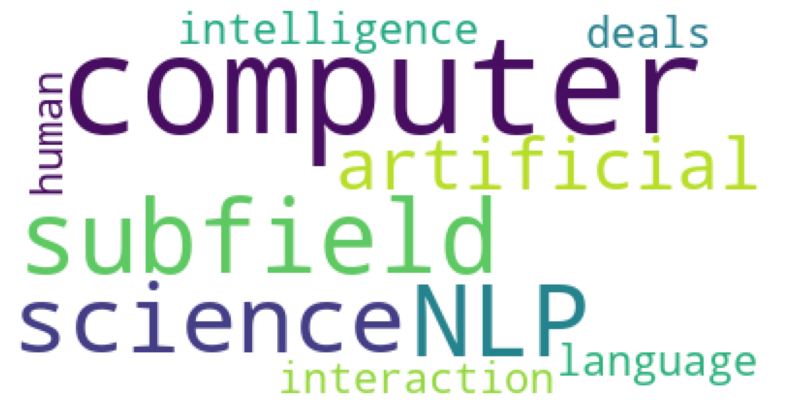

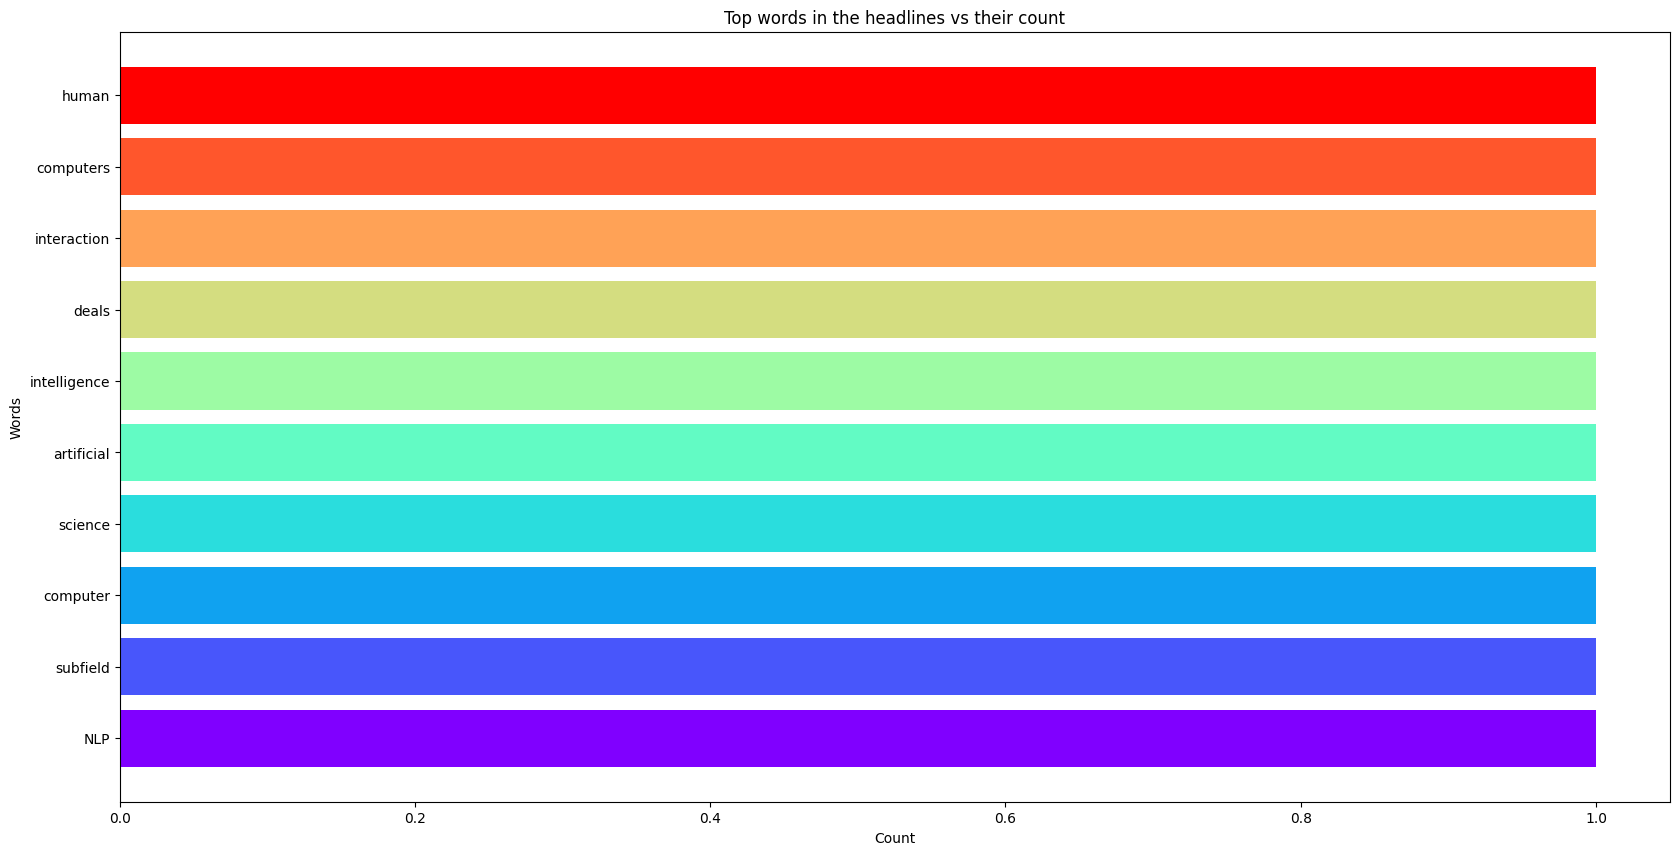

In [12]:
text = "NLP is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human language."

stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(text)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()

In [13]:
from transformers import pipeline

In [16]:
model_trained = "distilbert-base-uncased-finetuned-sst-2-english"

In [17]:
distil_bert_model = pipeline(task="sentiment-analysis", model=model_trained)

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [15]:
#pip install -q transformers
#from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
results = sentiment_pipeline(data)

for result in results:
    print(f"Text: {result['label']} (confidence: {result['score']:.2f})")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Instantiate the SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

# Sample sentences
sentences = "I love this product! It's amazing."

sentiment_scores = vader.polarity_scores(sentences)
compound_score = sentiment_scores['compound']

if compound_score > 0.05:
    sentiment = "Positive"
elif compound_score < -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Sentence: {sentences}")
print(f"Sentiment: {sentiment} (Compound Score: {compound_score:.2f})")
print("-" * 3)


Sentence: I love this product! It's amazing.
Sentiment: Positive (Compound Score: 0.85)
---


In [22]:
vader.polarity_scores(sentence)
preds = []
for each_review in sentence:
    result = vader.polarity_scores(each_review)
    if result['compound'] > 0.05:
        preds.append('positive')
    elif result['compound'] < -0.05:
        preds.append('negative')
    else:
        preds.append('neutral')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay 